---

<p align="center">
  <img src="/media/andres-campos/Archivos_Ubuntu/UCentral_Maestria/2023/Diplomado_Metodos_UCentral/data/images/imagen_ucentral.jpg" alt="logo_Ucentral" width="600px" height="350px">
</p>

# ___Diplomado: Métodos Estadísticos para el Análisis de Datos___

## ___Docente: Luis Andres Campos Maldonado.___

### ___Estadística descriptiva bivariada.___

- Correlación.
- Scatterplots.
- Tablas de contingencia.

---

In [1]:
## Protocolo de módulos.
import pandas            as pd            ## Manipulación de dataset.
import numpy             as np            ## Manipulación numérica y matricial
import matplotlib.pyplot as plt           ## Librería gráfica.
import seaborn           as sns           ## Librería gráfica.
import plotly.express    as px            ## Librería gráfica.
import scipy.stats       as stats         ## Cálculo de estadísticas.
import warnings                           ## Manejo de warnings
##
warnings.filterwarnings("ignore")         ## Ignorar los warnings
plt.rcParams["figure.figsize"] = (16,5)   ## Plot de tamaño (16,5)
plt.style.use("ggplot")                   ## Estilo para los plots.

## ***Correlación.***

El análisis exploratorio de datos en muchos proyectos de modelado implica examinar la correlación entre features y entre features y una variable target (variable objetivo). Las features $X$ e $Y$ (cada una con datos numéricos) están correlacionadas positivamente si los valores altos de $X$ corresponde con valores altos de $Y$, de igual forma para los valores bajos. Ahora, si valores altos de $X$ van con valores bajos de $Y$, y viceversa, el diremos que las features están correlacionadas negativamente.

***Palabras claves:***

- **[Coeficiente de correlación:](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson)** Una métrica que mide la asociación lineal de features numéricas. Este es un valor entre $-1$ y $+1$.
*Pearson: relación lineal
- ***Matriz de correlación:*** Una tabla donde las features se muestran tanto en filas como en columnas, y en las celdas las correlaciones entre las features.

- ***Scatterplot:*** (Gráfico de dispersión) Un plot en la que el eje $x$ es el valor de una feature y el eje $y$ el valor de la otra. Ambas numéricas.

***Nota:*** Las variables pueden tener una asociación que **no es lineal**, en cuyo caso el coeficiente de correlación de Pearson puede no ser una métrica útil. La relación entre las tasas impositivas y los ingresos
recaudado es un ejemplo: a medida que las tasas impositivas aumentan desde cero, los ingresos recaudados también aumentan. Sin embargo, una vez que las tasas impositivas alcanzan un nivel alto y se acercan al 100%, la evasión fiscal aumenta y los ingresos fiscales en realidad disminuyen.

## ***Ejemplo 1.***

Vamos a considerar el famoso dataset [mtcars](https://cran.r-project.org/web/packages/explore/vignettes/explore_mtcars.html)

In [2]:
url_base = 'https://raw.githubusercontent.com/lacamposm/Diplomado_Metodos_UCentral/main/data/'
name_data = 'mtcars.csv'
mtcars = pd.read_csv(url_base + name_data, index_col=0)
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [4]:
#mejor como variable categorica
mtcars["cyl"].describe().to_frame

<bound method Series.to_frame of count    32.000000
mean      6.187500
std       1.785922
min       4.000000
25%       4.000000
50%       6.000000
75%       8.000000
max       8.000000
Name: cyl, dtype: float64>

In [5]:
# VS tambien se puede tratar como categorica (ver tabla. de descriptivos)
mtcars["vs"].describe().to_frame

<bound method Series.to_frame of count    32.000000
mean      0.437500
std       0.504016
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: vs, dtype: float64>

In [6]:
#numero de. carburadores puede ser tratada por categoria
mtcars[['cyl', 'vs', 'gear', 'carb']].describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,32.0,6.1875,1.785922,4.0,4.0,6.0,8.0,8.0
vs,32.0,0.4375,0.504016,0.0,0.0,0.0,1.0,1.0
gear,32.0,3.6875,0.737804,3.0,3.0,4.0,4.0,5.0
carb,32.0,2.8125,1.615200,1.0,2.0,2.0,4.0,8.0


In [7]:
#las variables todas las dejamos categoricas
list_categoric = ['cyl', 'vs', 'gear', 'carb']
##
for column in list_categoric:
    mtcars[column] = mtcars[column].astype('category')

mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   mpg     32 non-null     float64 
 1   cyl     32 non-null     category
 2   disp    32 non-null     float64 
 3   hp      32 non-null     int64   
 4   drat    32 non-null     float64 
 5   wt      32 non-null     float64 
 6   qsec    32 non-null     float64 
 7   vs      32 non-null     category
 8   am      32 non-null     int64   
 9   gear    32 non-null     category
 10  carb    32 non-null     category
dtypes: category(4), float64(5), int64(2)
memory usage: 2.7+ KB


In [8]:
## otra forma de hacer el ejercicio anterior
list_categoric = ['cyl', 'vs', 'gear', 'carb']

mtcars[list_categoric] = mtcars[list_categoric].astype("category")
mtcars.info()

#11.07.23: lectura 10 (1:15 hrs)

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   mpg     32 non-null     float64 
 1   cyl     32 non-null     category
 2   disp    32 non-null     float64 
 3   hp      32 non-null     int64   
 4   drat    32 non-null     float64 
 5   wt      32 non-null     float64 
 6   qsec    32 non-null     float64 
 7   vs      32 non-null     category
 8   am      32 non-null     int64   
 9   gear    32 non-null     category
 10  carb    32 non-null     category
dtypes: category(4), float64(5), int64(2)
memory usage: 2.7+ KB


Vamos construir la matriz de correlaciones lineales.

In [9]:
mtcars.corr().round(3)
#

,mpg,disp,hp,drat,wt,qsec,am
mpg,1.000,-0.848,-0.776,0.681,-0.868,0.419,0.600
disp,-0.848,1.000,0.791,-0.710,0.888,-0.434,-0.591
hp,-0.776,0.791,1.000,-0.449,0.659,-0.708,-0.243
drat,0.681,-0.710,-0.449,1.000,-0.712,0.091,0.713
wt,-0.868,0.888,0.659,-0.712,1.000,-0.175,-0.692
qsec,0.419,-0.434,-0.708,0.091,-0.175,1.000,-0.230
am,0.600,-0.591,-0.243,0.713,-0.692,-0.230,1.000


En todos los casos se muestra la correlación de Pearson, note que la inspección de esta forma es bastante complicada.

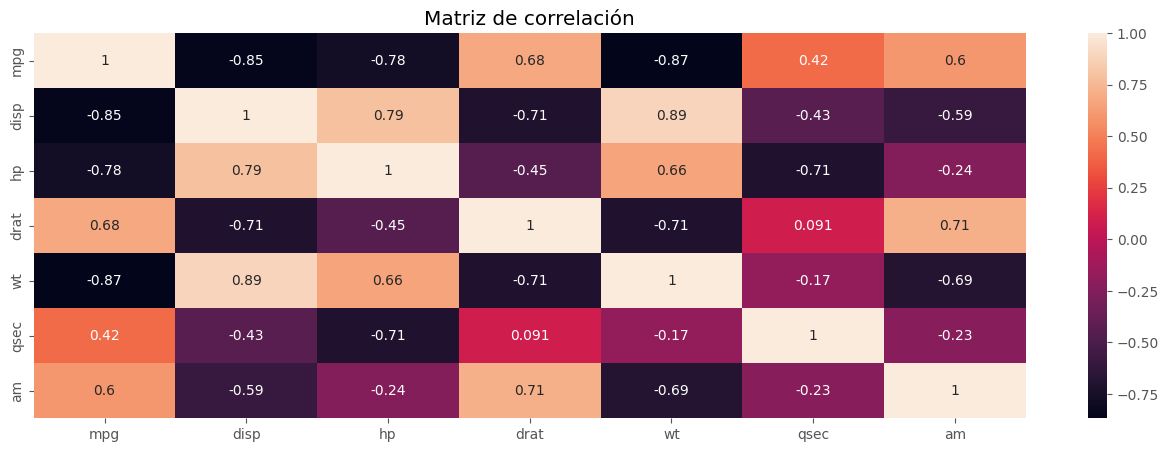

In [10]:
## Heatmap, matriz de correalción de Pearson.
sns.heatmap(mtcars.corr(), annot=True)
plt.title('Matriz de correlación')
plt.show()

***Nota:***  Los estadísticos propusieron hace mucho tiempo otros tipos de coeficientes de correlación, como el [rho de Spearman](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Spearman) o el [tau de Kendall](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_rango_de_Kendall). (no parametricas?)Estos son coeficientes de correlación basados ​​en el rango de los datos. Ya que trabajan con rangos en lugar de valores, estas estimaciones son robustas a valores atípicos
y puede manejar ciertos tipos de no linealidades. Sin embargo, generalmente nos ceñirmos al coeficiente de correlación de Pearson. El atractivo de las estimaciones basadas en rangos es principalmente para conjuntos de datos más pequeños y pruebas de hipótesis específicas.

#### ***Scatterplots.***

La forma estándar de visualizar la relación entre dos features numéricas es un scatterplot. El eje $x$ representa una feature y el eje $y$ otra, y cada
punto en el gráfico es un registro.



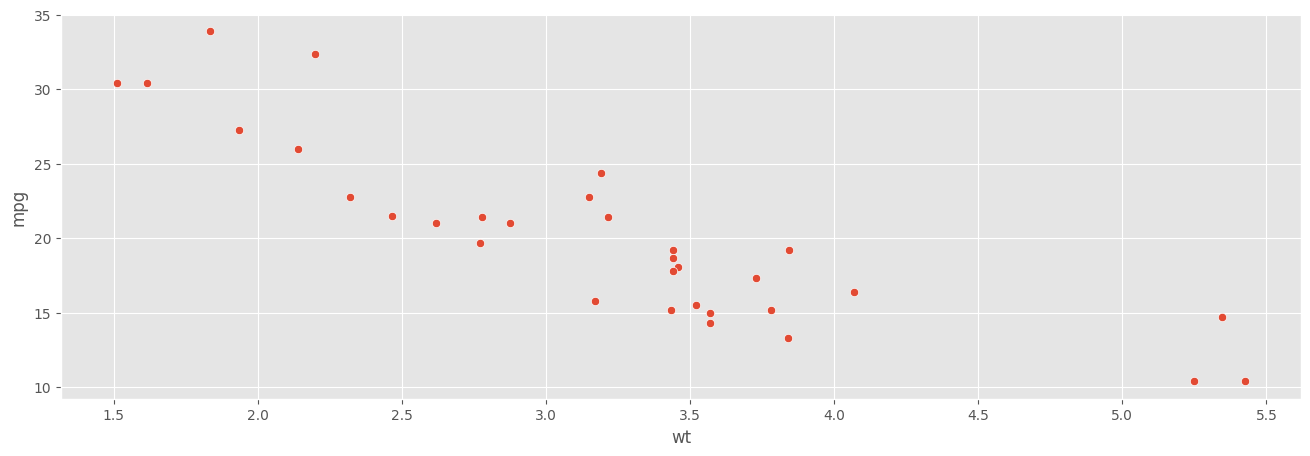

In [11]:
#correlacion pearson positiva
sns.scatterplot(data=mtcars, x= 'wt', y= 'mpg')
plt.show()

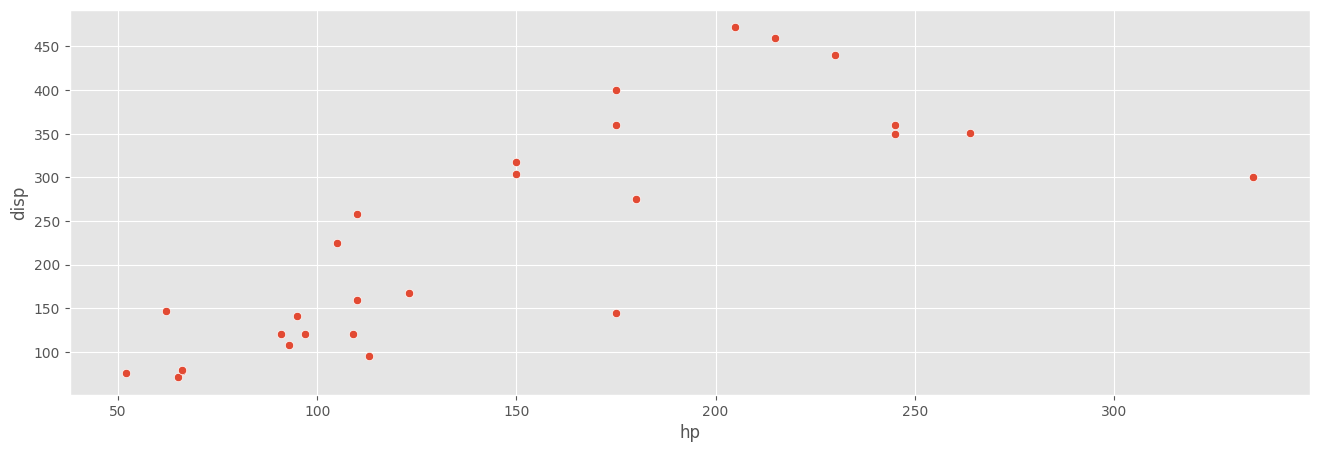

In [12]:
# correlacion pearson negativa
sns.scatterplot(data=mtcars, x= 'hp', y= 'disp')
plt.show()

In [13]:
## Dataser iris.
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


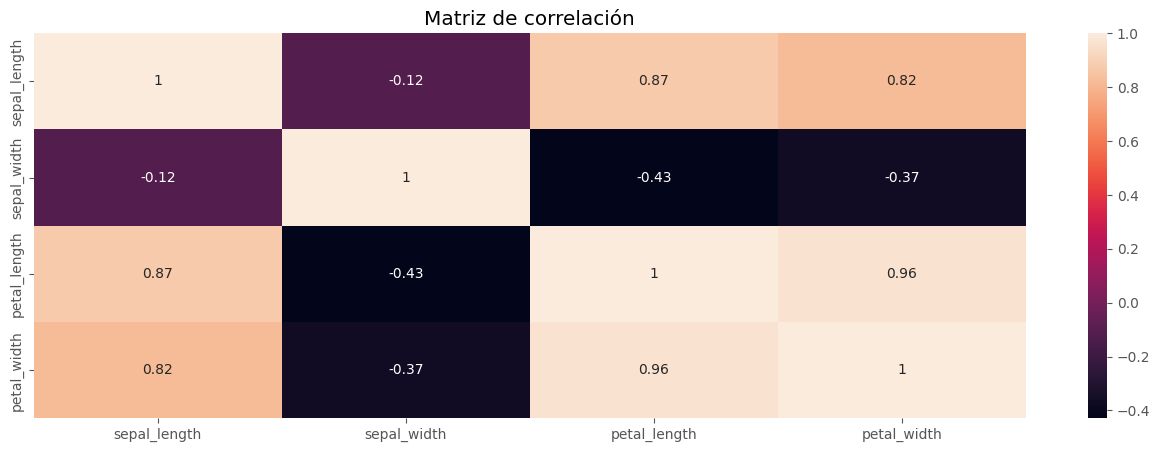

In [47]:
## Heatmap, matriz de correalción de Pearson.
## hay una correlacion llneal
sns.heatmap(iris.corr(), annot=True)
plt.title('Matriz de correlación')
plt.show()

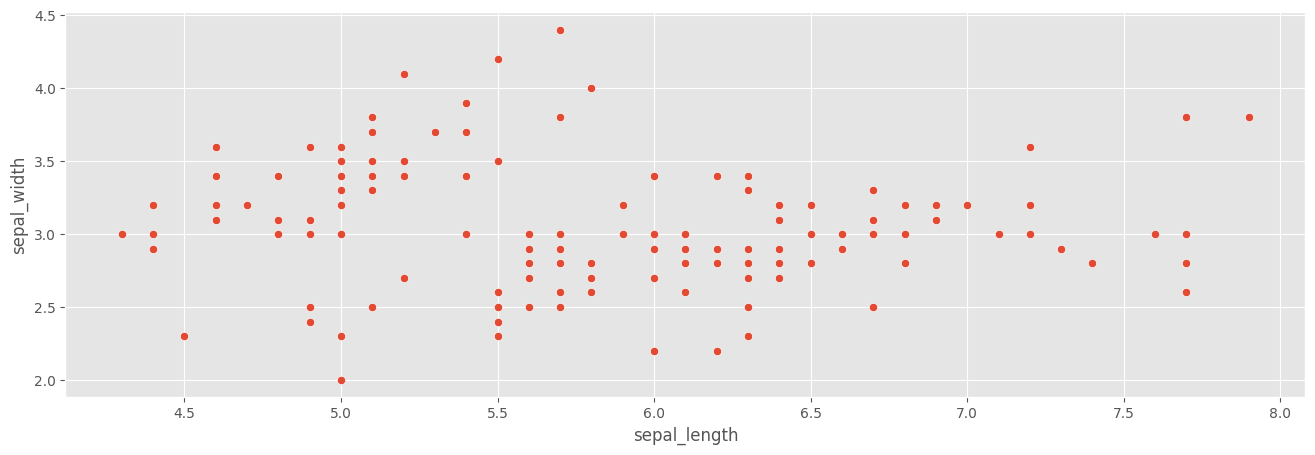

In [15]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width')
plt.show()

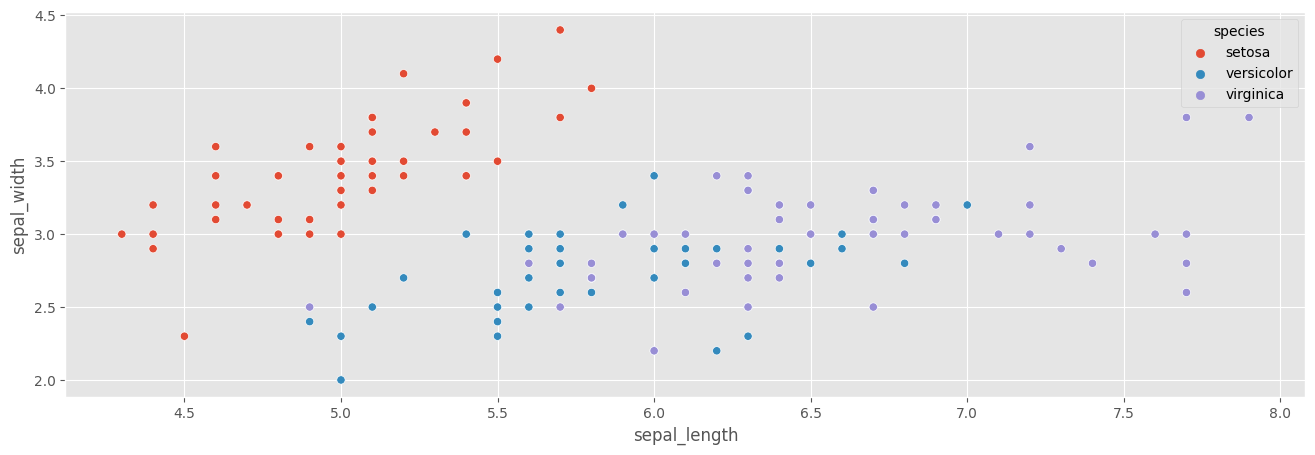

In [16]:
## separar por categorias
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.show()

In [17]:
## Podemos hacerlo con Plotly
fig = px.scatter(data_frame=iris, x='sepal_length', y='sepal_width', hover_name='species',
                 color='species', hover_data={'species':False})
fig.show()

### ***Ejercicio:***

Encontrar los coeficientes de correlación en las features anteriores por los distintos grupos de especie.

In [49]:
#Correlaciones
##fila 0, columna 1
iris.corr().iloc[0,1]
iris.corr().iloc[0,1]

-0.11756978413300088

In [18]:
for specie in iris['species'].unique():
  corr = iris[iris['species']==specie][['sepal_length','sepal_width']].corr().iloc[0,1]
  print(f'La correlación de las features en la especie {specie} es: {corr:.3f}')

La correlación de las features en la especie setosa es: 0.743
La correlación de las features en la especie versicolor es: 0.526
La correlación de las features en la especie virginica es: 0.457


In [19]:
# Aporte estudiante  :)
iris.groupby(by=['species'])[['sepal_length','sepal_width']].corr()

sepal_length  sepal_width
species                                           
setosa     sepal_length      1.000000     0.742547
           sepal_width       0.742547     1.000000
versicolor sepal_length      1.000000     0.525911
           sepal_width       0.525911     1.000000
virginica  sepal_length      1.000000     0.457228
           sepal_width       0.457228     1.000000

In [20]:
## agg = agregar y despues la  estadistica
## agg(['describe']
iris.groupby(by=['species'])[['sepal_length','sepal_width']].agg(['count', 'mean', 'sum'])

sepal_length               sepal_width              
                  count   mean    sum       count   mean    sum
species                                                        
setosa               50  5.006  250.3          50  3.428  171.4
versicolor           50  5.936  296.8          50  2.770  138.5
virginica            50  6.588  329.4          50  2.974  148.7

In [21]:
## Podemos hacerlo con Plotly
fig = px.scatter(iris, x = "petal_length", y = "petal_width", hover_name = "species",
                 color = "species", hover_data = {"species":False})
fig.show()

Note que la correlación es este caso es positiva, es decir a mayor longitud de pétalo, mayor ancho del mismo. Vamos a hacer uso de [sns.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

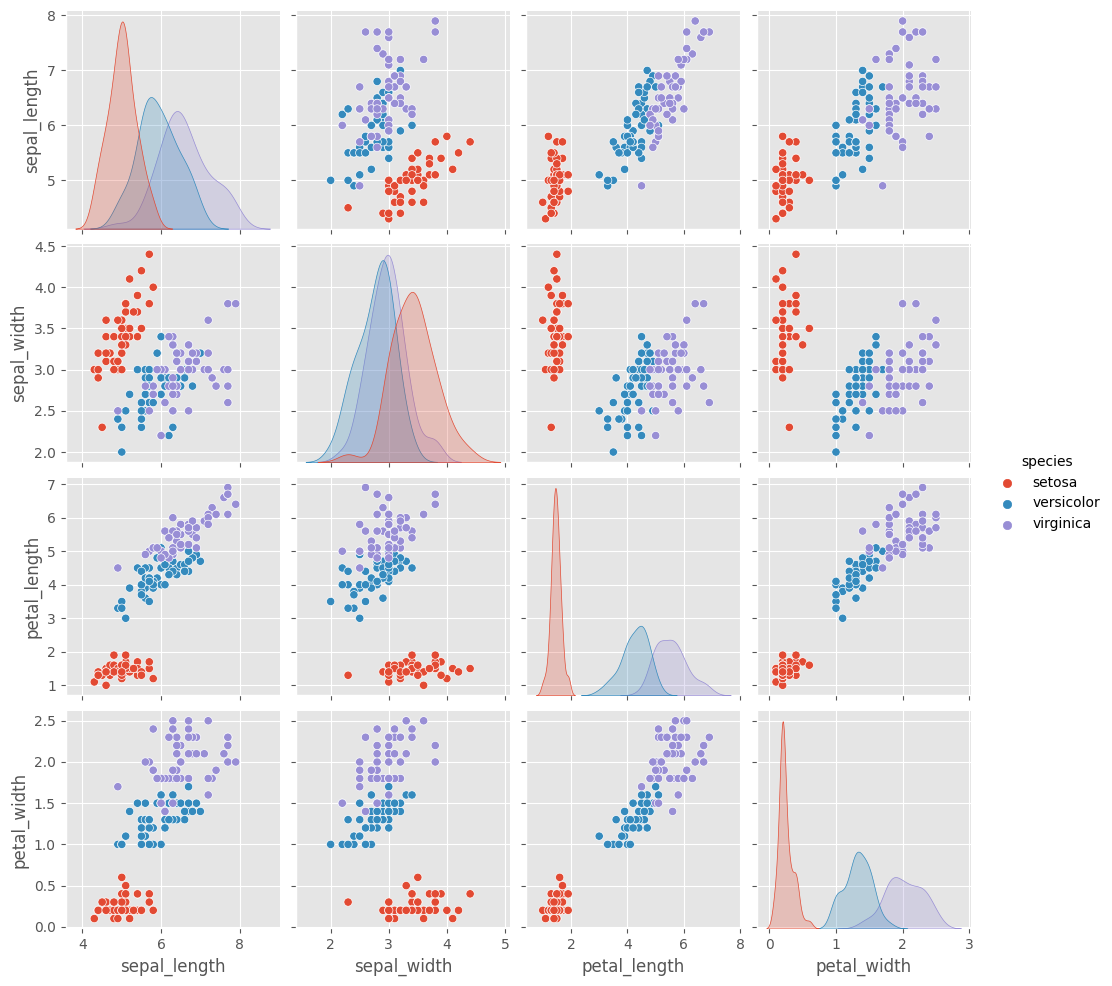

In [22]:
### Todos los scatterplots en uno solo.
sns.pairplot(iris, hue='species')
plt.show()

El paso que puede seguir después de observar una alta correlación, es ajustar una recta de regresión:

In [23]:
mtcars[['wt','mpg']].corr()

,wt,mpg
wt,1.000000,-0.867659
mpg,-0.867659,1.000000


In [24]:
##
fig = px.scatter(mtcars, x='wt', y = 'mpg', trendline='ols', trendline_color_override='red',
                 title='Scatterplot con recta de regresión OLS')
fig.show()

***Comentarios:***

• El coeficiente de correlación de Pearson mide la asociación lineal en que dos features emparejadas.

• El coeficiente de correlación es una métrica estandarizada, por lo que siempre oscila entre
–1 (correlación negativa perfecta) a +1 (correlación positiva perfecta).

• Un coeficiente de correlación de cero indica que no hay correlación lineal.

## ***Explorando dos o más variables.***

Los estimadores familiares, como la media y la varianza, analizan las features una a la vez (análisis univariante). El análisis de correlación es un método importante que compara dos variables (análisis bivariado). Vamos a analizar estimaciones y gráficos, en más de dos variables (análisis multivariante).

***Palabras claves.***

- ***Tabla de contingencias:*** Un conteo entre los cruces dos o más variables categóricas.

- ***Plot de contorno:*** Un gráfico que muestra la densidad de dos variables numéricas como un mapa topográfico.

- ***Violín plot*** Similar a un diagrama de caja pero mostrando la densidad estimada.

In [25]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

***Plot de contorno.***

Los contornos son esencialmente un mapa topográfico para
dos variables; cada banda de contorno representa una densidad específica de puntos, aumentando a medida que se acerca a un “pico”.  Hacemos uso de [sns.kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) para su construcción.

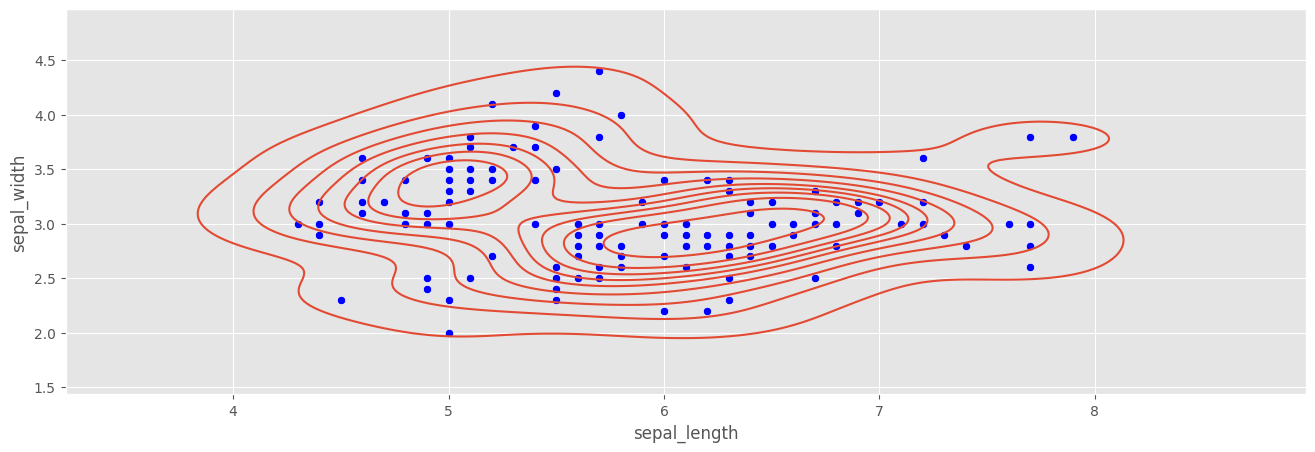

In [26]:
## Contour plot.
sns.kdeplot(x=iris['sepal_length'], y=iris['sepal_width'])
sns.scatterplot(x=iris['sepal_length'], y=iris['sepal_width'], color='blue')
plt.show()

El plot anterior muestra como los contornos más pequeños tienen una concentración más alta de punto. En contraste los contornos más "grandes" presentan una densidad de puntos menor, el plot anterior puede dar cuenta que la distribución conjunto en bi-modal, es decir tiene 2 picos.

## ***Dos variables categóricas.***

Una forma útil de resumir dos variables categóricas es una tabla de contingencia, es decir, una tabla de conteo por cruces de categorías.

In [27]:
name_file = 'lc_loans.csv'
lc_loans = pd.read_csv(url_base + name_file)
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


El dataset anterior contiene el resultado del prestamo (`status`) y el grado (`grade`) donde A es alto y G bajo.

In [28]:
lc_loans['status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late'], dtype=object)

In [29]:
#Variable categorica
lc_loans['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

De los valores de la feature "status" tenemos:

- Fully paid: Pagado en su totalidad.
- Current: Al día.
- late: Retrazado.
- Charged off: Descargado (No se espera recuperar el dinero).

Vamos a hacer uso de [pd.pivot_table()](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

In [30]:
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [31]:
crosstab = pd.pivot_table(data=lc_loans,              ## pandas-DataFrame para formar la tabla pivote.
                          index='grade',              ## Columna a ser índice.
                          columns='status',           ## Columna a ser etiquetas de las columnas
                          aggfunc=lambda x: len(x),   ## Función para operar en los grupos.
                          margins=True                ## Totales por fila y columna.
                          )
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


Note que a información anterior, aunque cuenta la historia de los datos, sus valores son dificiles de comparar. Se puede observar que cuando el grado es más alto se cumple en la gran mayoría con el pago. En los grados de menor calificación, el incumplimineto aumenta.

También podemos hacer uso de [pd.crosstab():](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

In [32]:
## Con pd.crosstab()
###no es necesario pasarle el dataframe
crosstab1 = pd.crosstab(index=lc_loans['grade'],       ## Las categorias que serán los indices.
                        columns=lc_loans['status'],    ## Las categorias que serán las columnas.
                        margins=True                   ## Totales por fila y columna.
                        )
crosstab1

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [ ]:
###12.07.23(2:09 hrs)
###lista

In [33]:
## Con lista.
#no se le pasa el dataframe, pero la lista (convertir a lista)
list_grade = lc_loans['grade'].to_list()
list_status = list(lc_loans['status'])
crosstab1 = pd.crosstab(index=list_grade,       ## Las categorias que serán los indices.
                        columns=list_status,    ## Las categorias que serán las columnas.
                        margins=True                   ## Totales por fila y columna.
                        )
crosstab1

col_0,Charged Off,Current,Fully Paid,Late,All
row_0,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


Veamos ahora la tabla por proporción:

In [34]:
crosstab2 = pd.crosstab(index=lc_loans["grade"],       ## Las categorias que serán los indices.
                        columns=lc_loans["status"],    ## Las categorias que serán las columnas.
                        margins=True,                  ## Totales por fila y columna.
                        normalize = "all"                ## Normalizado en todos los valores.
                        )
crosstab2.round(3)*100

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.3,11.1,4.5,0.1,16.1
B,1.2,20.8,6.9,0.5,29.4
C,1.3,19.7,5.1,0.6,26.8
D,1.1,11.8,3.0,0.5,16.5
E,0.6,5.5,1.3,0.3,7.7
F,0.3,1.9,0.5,0.1,2.9
G,0.1,0.4,0.1,0.0,0.7
All,5.0,71.2,21.6,2.2,100.0


In [35]:
## Tabla cruzada con proporciones por filas.
crosstab3 = pd.crosstab(index=lc_loans['grade'],       ## Las categorias que serán los indices.
                        columns=lc_loans['status'],    ## Las categorias que serán las columnas.
                        margins=True,                  ## Totales por fila y columna.
                        normalize='index'              ## Normalizado sobre cada fila. (Suma fila =1)
                        )
crosstab3.round(4)*100

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,2.15,69.05,28.15,0.65
B,4.01,70.90,23.54,1.55
C,4.98,73.57,19.15,2.30
D,6.74,71.73,18.42,3.11
E,8.17,70.79,17.09,3.95
F,11.83,65.44,18.04,4.70
G,12.62,61.40,19.84,6.14
All,5.03,71.22,21.58,2.17


In [36]:
crosstab3['total_fila'] = crosstab3.sum(axis=1)
crosstab3

status,Charged Off,Current,Fully Paid,Late,total_fila
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,1.0
B,0.040054,0.709013,0.235401,0.015532,1.0
C,0.049828,0.735702,0.191495,0.022974,1.0
D,0.067410,0.717328,0.184189,0.031073,1.0
E,0.081657,0.707936,0.170929,0.039478,1.0
F,0.118258,0.654371,0.180409,0.046962,1.0
G,0.126196,0.614008,0.198396,0.061401,1.0
All,0.050273,0.712223,0.215797,0.021707,1.0


In [37]:
## Tabla cruzada con proporciones por columnas.
crosstab4 = pd.crosstab(index=lc_loans['grade'],
                        columns=lc_loans['status'],
                        margins=True,
                        normalize='columns'        ## Normalizado en cada columna. (Suma en columnas=1)
                        )
crosstab4.round(3)*100

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,6.9,15.6,21.0,4.8,16.1
B,23.4,29.2,32.0,21.0,29.4
C,26.6,27.7,23.8,28.4,26.8
D,22.1,16.6,14.1,23.6,16.5
E,12.5,7.7,6.1,14.0,7.7
F,6.7,2.6,2.4,6.2,2.9
G,1.8,0.6,0.7,2.0,0.7


In [38]:
#porque pasa lo de arriba?
#12.07.23 (2:30 hrs)
lc_loans['grade'].value_counts(normalize=True)*100

B    29.352871
C    26.803870
D    16.470826
A    16.074561
E     7.717741
F     2.861445
G     0.718687
Name: grade, dtype: float64

In [39]:
total_columnas = crosstab4.sum().to_frame(name = "total_columna").T
crosstab4 = pd.concat([crosstab4,total_columnas ])
crosstab4.round(3)*100

status,Charged Off,Current,Fully Paid,Late,All
A,6.9,15.6,21.0,4.8,16.1
B,23.4,29.2,32.0,21.0,29.4
C,26.6,27.7,23.8,28.4,26.8
D,22.1,16.6,14.1,23.6,16.5
E,12.5,7.7,6.1,14.0,7.7
F,6.7,2.6,2.4,6.2,2.9
G,1.8,0.6,0.7,2.0,0.7
total_columna,100.0,100.0,100.0,100.0,100.0


## ***Datos categóricos y numéricos.***

Los box-plots son una forma sencilla de
comparar las distribuciones de una feature numérica agrupada de acuerdo con una feature categórica.

In [40]:
## airline_stats.csv
airline = pd.read_csv(url_base + 'airline_stats.csv')
airline.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


El dataset anterior contiene el porcentaje diario de retrasos de algunas aerolineas.

Las features son:

- `pct_carrier_delay` = `% retraso de la aerolinea`
- `pct_atc_delay` = `% retraso por control de tráfico`
- `pct_weater_delay` = `% retraso por clima`

In [41]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [42]:
airline['airline'].unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [43]:
## Box-plots por aeroline y % de retrazos.
fig = px.box(airline, y='pct_carrier_delay', color='airline',
             color_discrete_sequence=['red','skyblue','orange','green','grey','pink'])
fig.update_layout(xaxis_title='Aerolinea', yaxis_title='% de retrasos diarios')
fig.show()

**Alaska** se destaca por tener la menor cantidad de retrasos, mientras que **American** tiene la mayor cantidad de retrasos: el cuartil inferior de **American** es más alto que el cuartil superior de **Alaska.**



***Violinplot.***

Un violinplot es una mejora del box-plot ya que traza la estimación de la densidad. La densidad se refleja y se voltea, y la forma resultante se rellena, creando una imagen que se asemeja a un violín. La ventaja de un violinplot es que puede mostrar matices en la distribución que no son perceptibles en un box-plot. Por otro lado, el box-plot muestra claramente los valores atípicos en los datos.



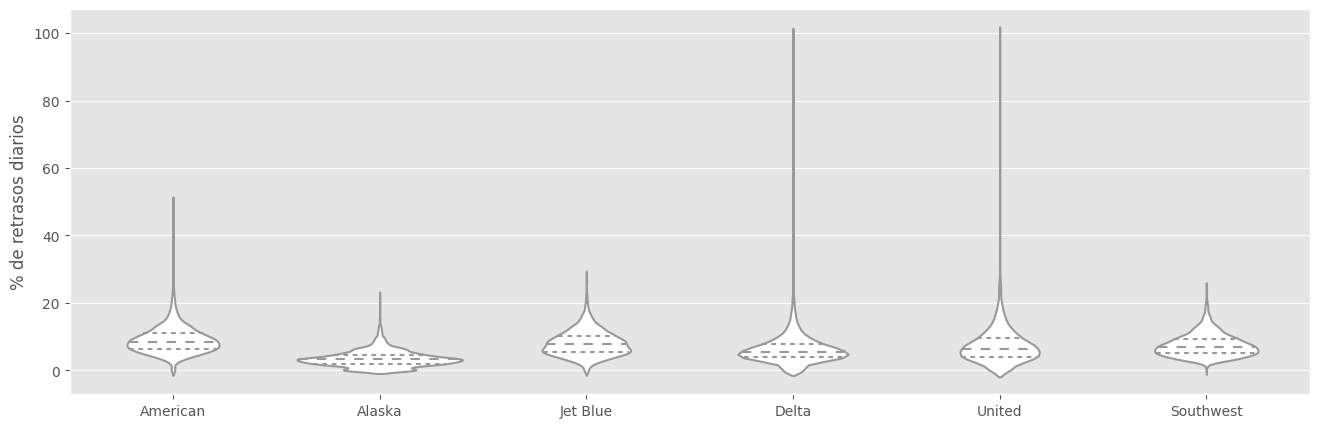

In [44]:
sns.violinplot(x = airline["airline"],
               y = airline["pct_carrier_delay"],
               inner="quartile",
               color="white")
plt.xlabel("")
plt.ylabel("% de retrasos diarios")
plt.show()

El plot anterior muestra una concentración en la distribución cercana a cero para **Alaska** y, en menor medida, **Delta**. Este fenomeno, no están obvio en el box-plot.

## ***Visualización de múltiples variables.***

Los plot vistos anteriormente se extienden fácilmente a más variables a través de la noción de condicionamiento. Podemos usar para este proposito a [Facetgrid()](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) del módulo seaborn.

In [45]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
###12.07.23 (2:30 hrs)
###seaborn

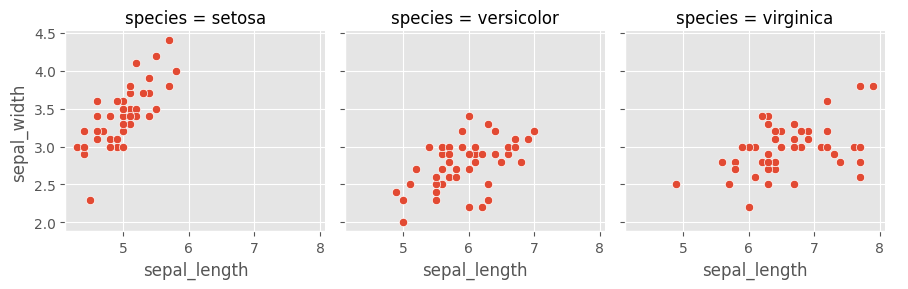

In [46]:
g = sns.FacetGrid(iris, col="species",)
g.map_dataframe(sns.scatterplot, x="sepal_length", y="sepal_width")
g.add_legend()
plt.show()

### ***Conclusión.***

Revisamos algunos aspectos de las estadísticas descriptivas bivariadas.